## NAME : KEVIN KHUNT
## CAMPUS ID : 030833541

<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [1]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [3]:
image = np.array(Image.open('lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Original Image shape :  (100, 100, 3)
Single Channel Image Shape :  (100, 100)


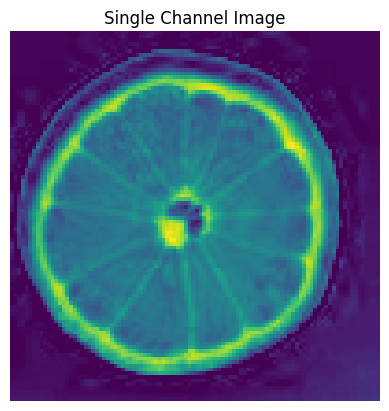

In [16]:
# Shape of the Image
print("Original Image shape : ",image.shape)

# img_single_channel is equivalent to the last color channel of image
img_single_channel = image[:,:,-1]

# Printing the shape of img_single_channel to check that it has the same number of pixels as the original image
print("Single Channel Image Shape : ",img_single_channel.shape)

# Using plt.imshow for showing the img_single_channel
plt.imshow(img_single_channel)
plt.title("Single Channel Image")
plt.axis("off")
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Average Channel Image Shape :  (100, 100)


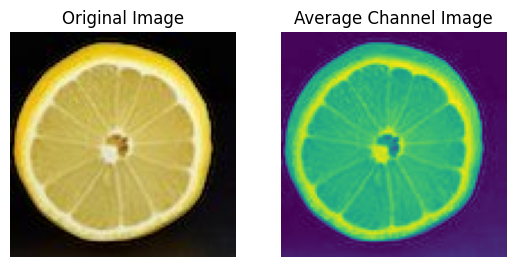

In [30]:
# Calculating the average of all three color channels to create img_average_channel
img_average_channel = np.mean(image, axis = 2)

# Printing the shape of img_average_channel
print("Average Channel Image Shape : ", img_average_channel.shape)

# Using plt.imshow() Method to plot the original image in 'image'

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')  # Turn off axis labels

plt.subplot(1, 2, 2)
plt.imshow(img_average_channel)
plt.title("Average Channel Image")
plt.axis('off')  # Turn off axis labels

plt.show()


## Differences and which one is better

The original image (from Part 1) retains all the color information, including the differences in color between pixels. It provides a visually detailed representation of the image.

The average channel image (from Part 2) represents the image as a grayscale image, where the color information has been averaged across all channels. This results in a loss of color detail, and the image appears in grayscale.

The choice between the two depends on specific use case and goals:

If you want to work with color information and need to preserve the original color details, the original image (from Part 1) is better.

If you only need the overall intensity or luminance information of the image and color is not essential, then the average channel image (from Part 2) may be more appropriate. This can be useful in some image processing tasks like edge detection or grayscale analysis.

Ultimately, the choice between the two representations depends on the specific requirements of project or analysis.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

## Identity Matrix

An identity matrix, often denoted as "I" or "I_n" (where n represents the size of the square matrix), is a special type of square matrix. It has the following characteristics:

1. Diagonal Elements: The diagonal elements of an identity matrix are all equal to 1.
2. Off-Diagonal Elements: All the off-diagonal elements (elements not on the main diagonal) are equal to 0.
3. Square Matrix: An identity matrix is always a square matrix, meaning it has the same number of rows and columns.

Multiplying any matrix by an identity matrix of the appropriate size doesn't change the original matrix. In other words, if you have a matrix A and multiply it by the identity matrix I_n of the same size, the result is still matrix A.

Mathematically, for a matrix A of size m x n, if we multiply it by the identity matrix I_n of size n x n, we get:

A * I_n = A

In [31]:
# Getting the shape of img_average_channel
rows, cols = img_average_channel.shape

# Creating an identity matrix of the same size as img_average_channel
identity_matrix = np.eye(rows, cols)

# Printing a random row from identity_matrix
random_row_index = np.random.randint(0, rows)  # Generate a random row index
random_row = identity_matrix[random_row_index, :]

print("Random Row from Identity Matrix:")
print(random_row)

Random Row from Identity Matrix:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Observations:

The random row we print will have all 0s except for one element, which will be 1. This is in line with the definition of an identity matrix, where the diagonal elements are 1, and the off-diagonal elements are 0.
The row index chosen is random, so we will get different results each time we run the code.

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [33]:
# Getting the number of rows in img_average_channel
num_rows = img_average_channel.shape[0]

# Creating an array containing the numbers 0, 1, ..., N-1 (N is the number of rows)
rows = np.arange(num_rows)

# Shuffling the row indices using numpy.random.shuffle
np.random.shuffle(rows)

# Printing the shuffled row indices
print("Shuffled Row Indices:")
print(rows)


Shuffled Row Indices:
[72 10 89 55 25 44 40 84 74 65 46 68 28 83 71 39 41 49 53 45  8 42 31 36
 75 78 12  5 18 56 21 96 86 24 34 92 50 32 82  4  1 73 67 64  2 35 66 19
 15 14 43 26  0 69 87 95 76 29 13  7 11 48 38 77 99 93 97 47 33 60 37 90
 52 57 30 79 22 85 16 61 54 20 80 98  6 70  9 17  3 23 94 63 81 88 59 27
 58 62 91 51]


When we print rows, we will see an array of row indices in a random order. These shuffled indices can be used to rearrange the rows of img_average_channel or any other matrix as needed.

## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [34]:
# Create matrix T by rearranging rows of identity_matrix
T = identity_matrix[rows]

# Matrix T is essentially the same as identity_matrix, but with its rows reordered according to the rows variable. 
# It's like taking the identity matrix and shuffling its rows while keeping all other elements the same.
#This operation is commonly used in various applications like randomizing data for machine learning
#or permutation-based algorithms.

# Sanity check: Print the shape of T
print("Shape of T:", T.shape)

# Making sure T has the same size as identity_matrix and img_average_channel
if T.shape != identity_matrix.shape:
    T = T.reshape(identity_matrix.shape)  # Reshape if needed

# Check the shape again to ensure it matches
print("Shape of T after reshaping:", T.shape)

#The sanity check ensures that T has the same shape as both identity_matrix and img_average_channel.
#If the shapes do not match, we reshape T to the desired shape, which should be the same as the original identity matrix
#and img_average_channel.







Shape of T: (100, 100)
Shape of T after reshaping: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of transformed_image: (100, 100)


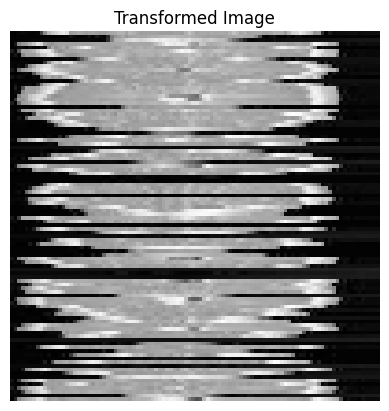

In [35]:
# Matrix multiply T and img_average_channel
transformed_image = T @ img_average_channel

# Print the shape of the result
print("Shape of transformed_image:", transformed_image.shape)

# Display the transformed_image using plt.imshow
plt.imshow(transformed_image, cmap='gray')  # Assuming it's a grayscale image
plt.title('Transformed Image')
plt.axis('off')
plt.show()

## Regarding the pattern we'll see in the transformed_image:

The transformation performed by multiplying T and img_average_channel can be described as a permutation or rearrangement of the rows of img_average_channel based on the shuffled indices in rows. Each row in transformed_image corresponds to a row in img_average_channel, but their order has been changed according to the shuffled rows variable.


## What each dot product in the matrix multiplication is doing:

For each row in T, it selects a row from img_average_channel based on the shuffled indices in rows. The dot product essentially combines the elements of these two rows, preserving the original values but rearranging them according to the order specified by rows.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Matrix T is invertible.


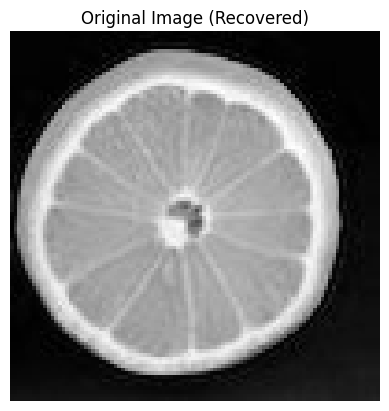

In [44]:
# To determine if matrix T is invertible, we need to check if it has full rank. If T has full rank, it is invertible; otherwise, it is not. In this context, full rank means that
# its rows are linearly independent.

# Here's how you can check if T is invertible and compute its inverse Tinv:

# Check if T is invertible (has full rank)
if np.linalg.matrix_rank(T) == T.shape[0]:
    # T is invertible
    Tinv = np.linalg.inv(T)
    print("Matrix T is invertible.")
else:
    print("Matrix T is not invertible.")

# Now, to retrieve the original image, performing the inverse of the scrambling operation
if "Tinv" in locals():
    # Tinv exists, indicating T is invertible
    original_image = Tinv @ transformed_image

    # Display the retrieved original image using plt.imshow
    plt.imshow(original_image, cmap='gray')  # Assuming it's a grayscale image
    plt.title('Original Image (Recovered)')
    plt.axis('off')
    plt.show()



## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

In [47]:
# Scramble the rows and columns of the original image using random permutations
np.random.shuffle(rows)  # Shuffle the row indices
scrambled_rows = img_average_channel[rows]  # Apply row scrambling

# Transpose the result to scramble the columns as well
scrambled_image = scrambled_rows.T  # Transpose to shuffle columns


In [49]:
# Invert the column scrambling by applying the inverse permutation
inverse_indices = np.argsort(rows)
scrambled_columns = scrambled_image[:, inverse_indices]  # Apply column scrambling

# Transpose the result to unscramble the rows
original_recovered_image = scrambled_columns.T  # Transpose to unshuffle rows


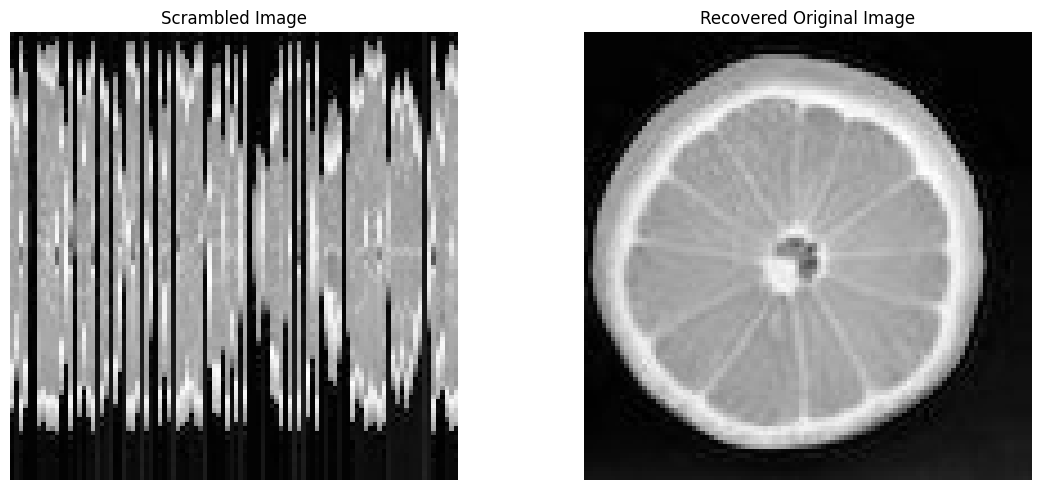

In [50]:
# Plot the scrambled image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(scrambled_image, cmap='gray')
plt.title("Scrambled Image")
plt.axis('off')

# Plot the recovered original image
plt.subplot(1, 2, 2)
plt.imshow(original_recovered_image, cmap='gray')
plt.title("Recovered Original Image")
plt.axis('off')

plt.tight_layout()
plt.show()
